<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/main/TP4_Les_r%C3%A9seaux_de_neurones_%C3%A0_l'aide_de_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP4: Les réseaux de neurones avec Keras 
## ---------------(Reconnaissance des chiffres)


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 


# Données utilisées: 
####Digit Recognizer:
####Learn computer vision fundamentals with the famous MNIST data

Lien de téléchargement: 

https://www.kaggle.com/competitions/digit-recognizer/data

In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
#from scipy.misc.pilutil import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


#Importation des données
Veuillez selectionner les fichiers (téléchargés plus haut)
 
*  train.csv
*sample_submission.csv
* test.csv

In [2]:
from google.colab import files
import io
uploader = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:

train = pd.read_csv(io.BytesIO(uploader["train.csv"]))
test = pd.read_csv(io.BytesIO(uploader["train.csv"]))
sample_submission = pd.read_csv(io.BytesIO(uploader["sample_submission.csv"]))


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Stockage des données d' entraînement et test dans des tableaux numpy
* "train.iloc[:,1:]"   permet d'indexer les pixels (exclure les labels qui est la  colonne numéro 0)

* transformer le resulta en tableau numpy avec ".values" et attribuer un type de données avec astype() 

In [5]:
train_x = (train.iloc[:,1:].values).astype('float32') # all pixel values
train_y = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits

test_x = (test.iloc[:,1:].values).astype('float32') # all pixel values
test_y = test.iloc[:,0].values.astype('int32') # only labels i.e targets digits


In [6]:
train_x.shape

(42000, 784)

In [7]:
train_y.shape

(42000,)

In [8]:
test_x.shape

(42000, 784)

## Créaction des données de validation
30 pourcent des données d'entraînement

In [9]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

print("Dim données d'entraînement : ", train_x.shape)
print("labels:", train_y.shape)
print("Dim données validation :", val_x.shape)
print("labels:", val_y.shape)


Dim données d'entraînement :  (29399, 784)
labels: (29399,)
Dim données validation : (12601, 784)
labels: (12601,)


##Convertir nos images en tableau numpy de 28*28 pour afficher

train_x.shape[0] représente le nombre d'image

In [10]:
reshape_train_x = train_x.reshape(train_x.shape[0], 28, 28)
reshape_val_x = val_x.reshape(val_x.shape[0], 28, 28)

print("Dim données d'entraînement : ", reshape_train_x.shape)
print("Dim données validation :", reshape_val_x.shape)


Dim données d'entraînement :  (29399, 28, 28)
Dim données validation : (12601, 28, 28)


In [11]:
import matplotlib.pyplot as plt

## Afficharge de 3 images avec pour titre leurs labels

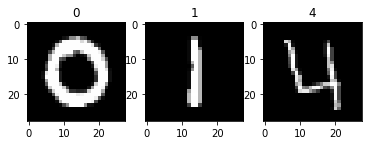

In [12]:

for i in range(1, 4):
    plt.subplot(1,3,i)
    plt.imshow(reshape_train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i]);

##Nomalisation de nos données d'entraînement et de validation

In [13]:
train_x = train_x / 255.0
val_x = val_x / 255.0
print("Dim données d'entraînement : ", train_x.shape)
print("Dim données validation :", val_x.shape)


Dim données d'entraînement :  (29399, 784)
Dim données validation : (12601, 784)


## Création de notre modèle de ML basé sur nos réseaux de neurones

In [14]:
# Définition des variables
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

nb_epochs = 5
batch_size = 128

In [15]:
# importation des outils du module de Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [16]:
# Création du modèle
model = Sequential()
model.add(Dense(input_num_units, activation='relu'))
model.add(Dense(hidden_num_units, activation='relu'))
model.add(Dense(output_num_units,  activation='softmax'))


Création d'un modèle séquentiel de trois couches de neurones. la première couche est composée des entrée et la sortie étant les neurones de la couche cachée(une seule ici) contenant 50 neurones. 
par la suite ces neurones serviront d'éntrées à notre dernière couche(sortie) comportant 10 neurones, en rapport avec nos 10 différents chiffres à prédire

In [17]:
# compiler de modèle avec les attributs nécessaires
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam' , metrics = ['accuracy']) 

## modèle

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  615440    
                                                                 
 dense_1 (Dense)             multiple                  39250     
                                                                 
 dense_2 (Dense)             multiple                  510       
                                                                 
Total params: 655,200
Trainable params: 655,200
Non-trainable params: 0
_________________________________________________________________


## Entraînement du modèle

In [23]:
historique = model.fit(train_x, train_y, epochs = nb_epochs, batch_size = batch_size
                          , validation_data = (val_x, val_y))


Epoch 1/5
230/230 [==============================] - 5s 18ms/step - loss: 0.3292 - accuracy: 0.9039 - val_loss: 0.1714 - val_accuracy: 0.9500
Epoch 2/5
230/230 [==============================] - 4s 16ms/step - loss: 0.1243 - accuracy: 0.9630 - val_loss: 0.1333 - val_accuracy: 0.9594
Epoch 3/5
230/230 [==============================] - 4s 16ms/step - loss: 0.0775 - accuracy: 0.9760 - val_loss: 0.0937 - val_accuracy: 0.9711
Epoch 4/5
230/230 [==============================] - 4s 16ms/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0950 - val_accuracy: 0.9719
Epoch 5/5
230/230 [==============================] - 4s 15ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0916 - val_accuracy: 0.9719


## Courbes d"apprentissage

In [30]:
loss_curve = historique.history["loss"]
val_loss = historique.history["val_loss"]

acc_curve =  historique.history["accuracy"]
val_acc =  historique.history["val_accuracy"]


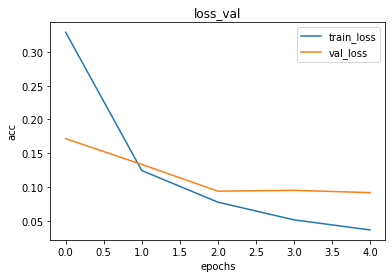

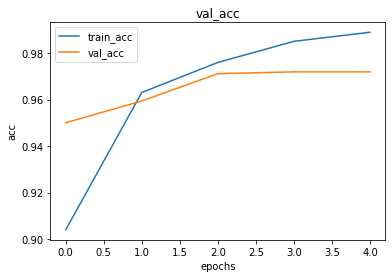

In [42]:
plt.plot(loss_curve, label = "train_loss")
plt.title('loss')
plt.plot(val_loss, label = "val_loss")
plt.title('val_loss')
plt.xlabel('epochs')
plt.ylabel("acc")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "train_acc")
plt.title('accuracy')
plt.plot(val_acc, label = "val_acc")
plt.title('val_acc')
plt.xlabel('epochs')
plt.ylabel("acc")
plt.legend()

plt.show()

##Évaluation du modèle sur les données de test


In [43]:
resultat = model.evaluate(test_x , test_y)


1313/1313 [==============================] - 5s 4ms/step - loss: 6.3040 - accuracy: 0.9873


In [44]:
print("***Erreur, Précision:", resultat)

***Erreur, Précision: [6.304048538208008, 0.9872618913650513]
